# People Love Amazon 

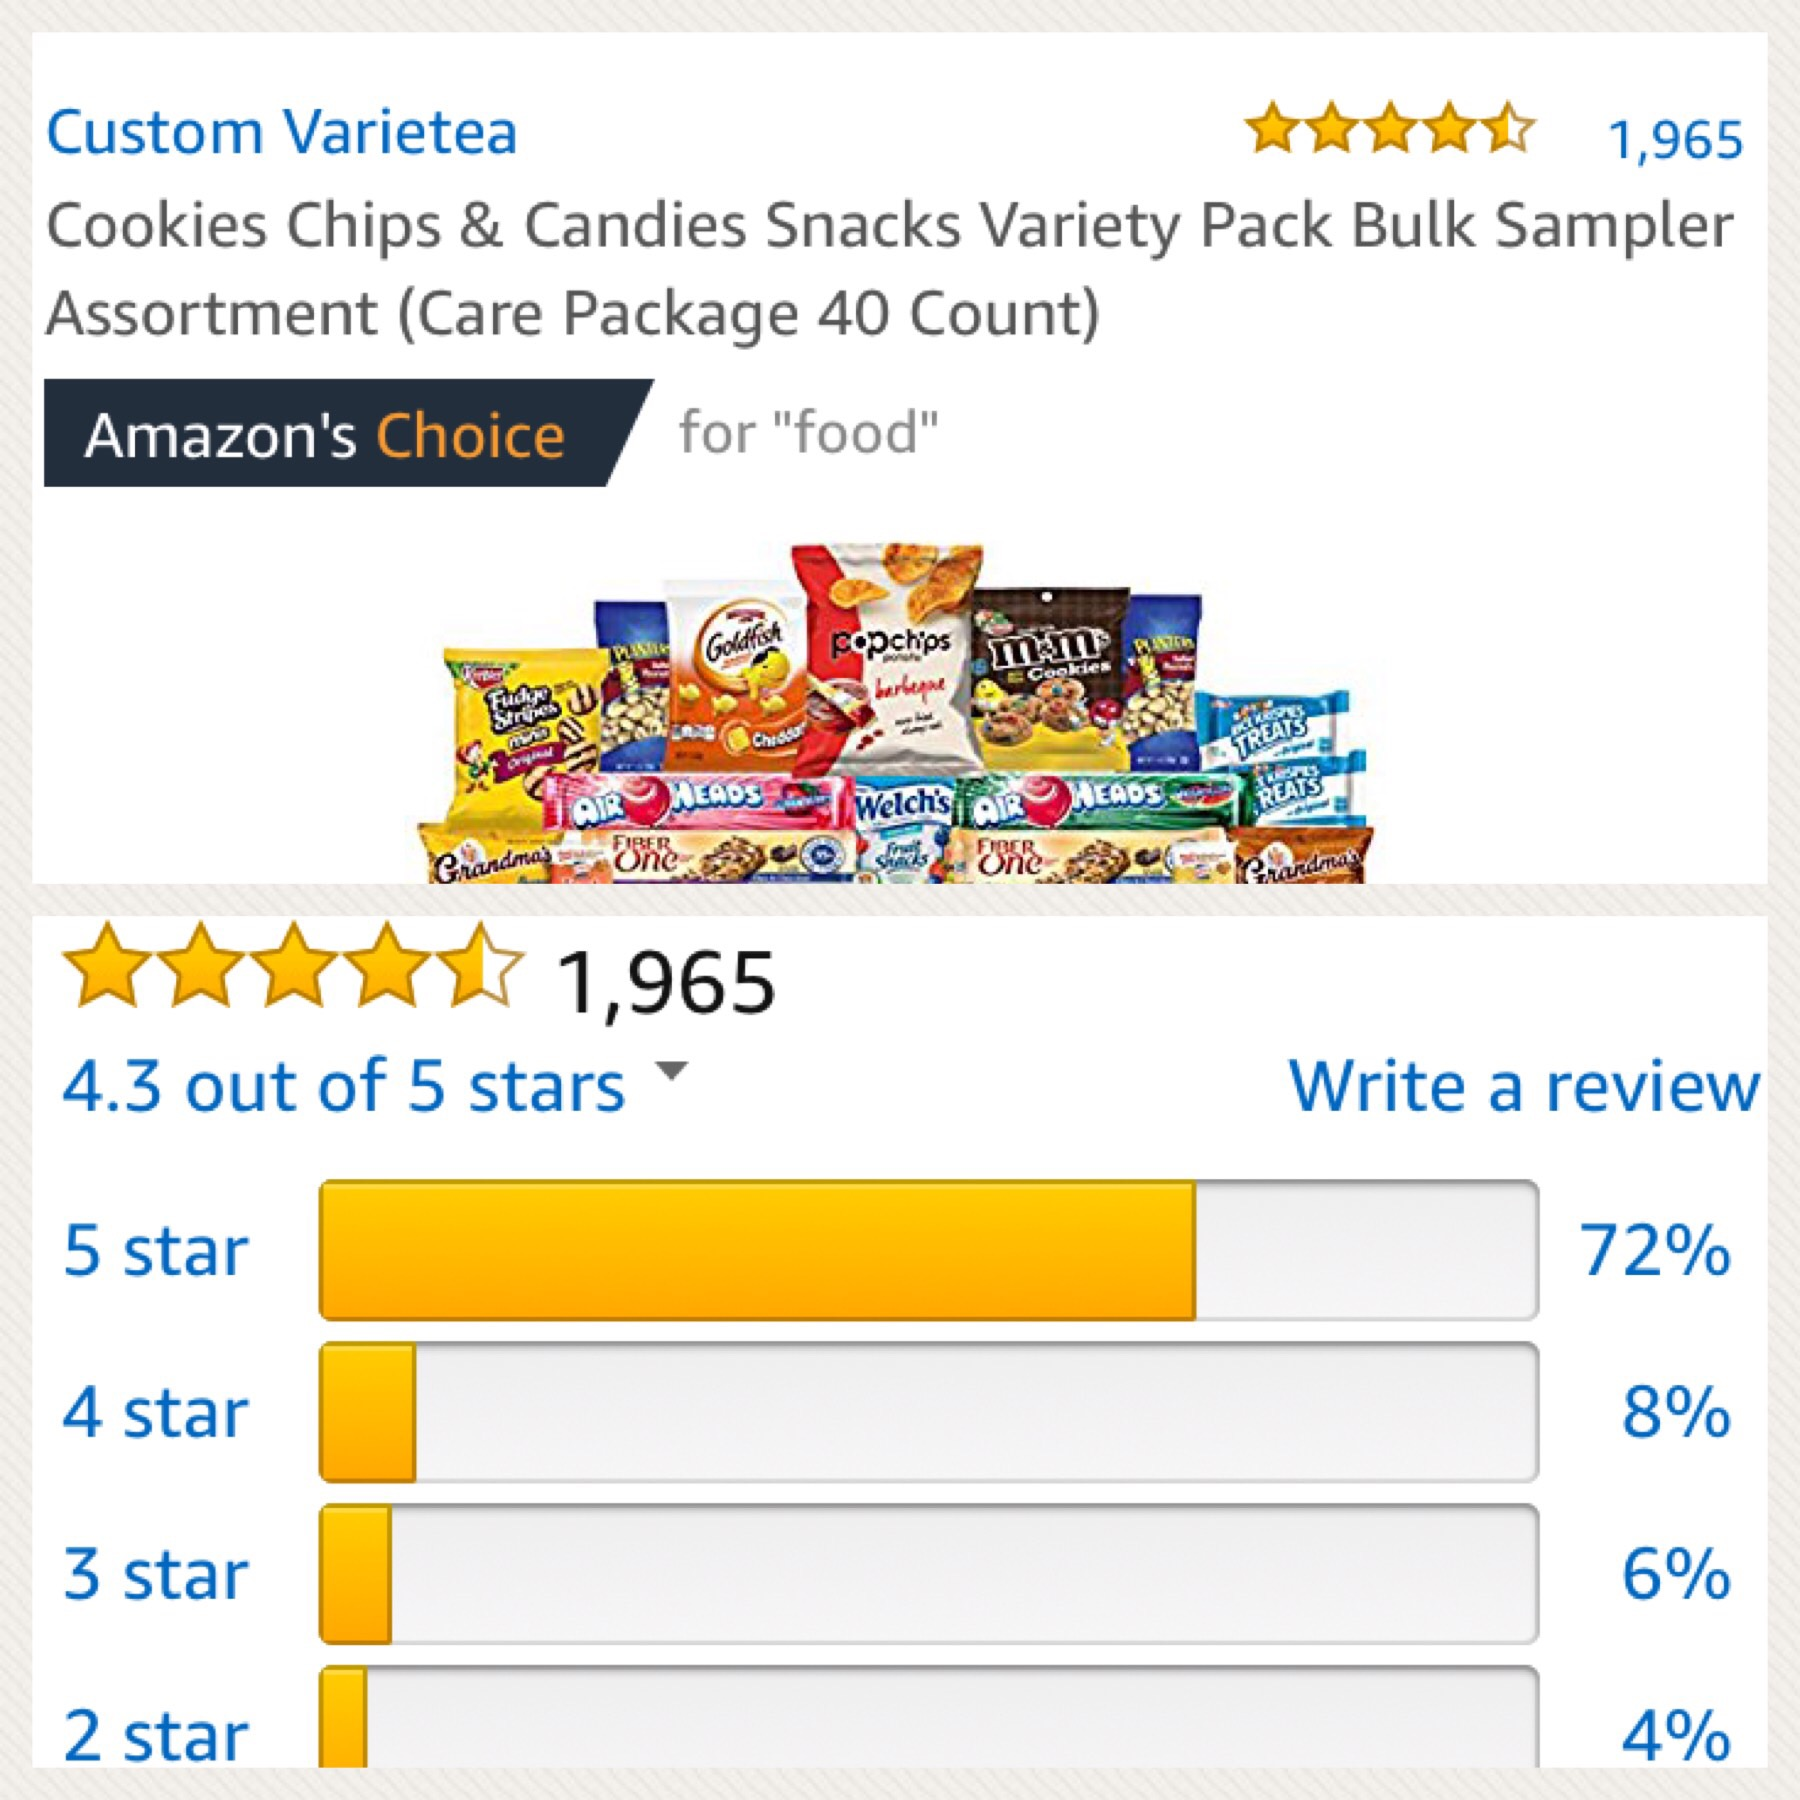

In [229]:
from IPython.display import Image
Image(filename='amazon.png')
Image(filename='IMG_3294.JPG')

# Project Overview 

Background: Recently more and more Amazon sellers realized how customers’ reviews can impact other buyers’ decision making. Since most of customers will hesitate to make a purchase decision if the product has a negative review.  As an analyst, my goal is to help the business to provide the good shopping experience. So, I want to develop the model to predict if a review is helpful or not helpful from sentiment analysis.  Then the modeling outcome will help Amazon’s merchants have better understand about customers’ attitudes towards reviews.

In [125]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame, datetime
from subprocess import check_output
from datetime import datetime, timedelta, time
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as cm
import seaborn as sns

# 1. Data Preparation 

## Clean Numeric Data
+ Clean missing value
+ Check duplicate 

In [126]:
amazon = pd.read_csv('Reviews.csv')
amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


+ Id
+ ProductId - unique identifier for the product
+ UserId - unqiue identifier for the user
+ ProfileName
+ HelpfulnessNumerator - number of users who found the review helpful
+ HelpfulnessDenominator - number of users who indicated whether they found the review helpful
+ Score - rating between 1 and 5
+ Time - timestamp for the review
+ Summary - brief summary of the review
+ Text - text of the review

In [127]:
#check number of observations and row
print (amazon.shape)

(568454, 10)


In [128]:
#check missing value 
amazon.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   26
Text                       0
dtype: int64

In [131]:
# Remove missing values
amazon= amazon.dropna(subset=['ProfileName','Summary'])
amazon.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [132]:
#check number of observations and row
print (amazon.shape)

(568412, 10)


In [133]:
# covert time
amazon['date_time']=pd.to_datetime(amazon['Time'],unit='s')
amazon['date']=pd.to_datetime(amazon['date_time'],unit='d')

In [143]:
amazon.date_time.describe()

count                  568412
unique                   3168
top       2012-10-16 00:00:00
freq                     1143
first     1999-10-08 00:00:00
last      2012-10-26 00:00:00
Name: date_time, dtype: object

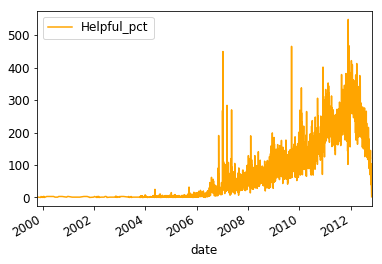

In [182]:
time1=amazon[['date','Helpful_pct']].copy()
time1['Helpful_pct']=amazon.groupby(['date']).Helpful_pct.transform('count')
time1.set_index(['date'],inplace=True)
time1.sort_index(inplace=True)
time1.plot(color='orange')

In [145]:
amazon['Helpful_pct'] = amazon['HelpfulnessNumerator'] / amazon['HelpfulnessDenominator']
amazon['Helpful_pct'].describe()

count    298372.000000
mean          0.777035
std           0.346273
min           0.000000
25%           0.600000
50%           1.000000
75%           1.000000
max           3.000000
Name: Helpful_pct, dtype: float64

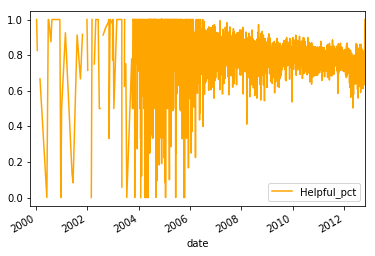

In [147]:
## Average Helpfulness
time1=amazon[['date','Helpful_pct']].copy()
time1['Helpful_pct']=time1.groupby(['date']).Helpful_pct.transform('mean')
time1.set_index(['date'],inplace=True)
time1.sort_index(inplace=True)
time1.plot(color='orange')

####  After remove missing value and covert time formate. The dataset contains 568,412 food reviews from Amazon users left from 1999 Oct to 2012 Oct.

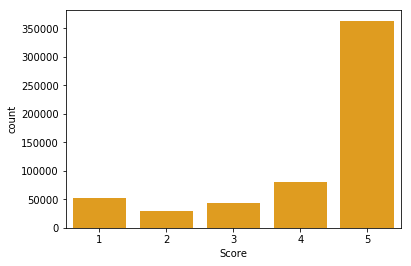

In [148]:
sns.countplot(amazon['Score'],color="orange")
plt.show()

In [149]:
print("Average Score: ",np.mean(amazon.Score))
print("Median Score: ",np.median(amazon.Score))

Average Score:  4.183307178595808
Median Score:  5.0


####  The distribution of rating among all of the reviews. We see that 5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%). Majority of Scores are around 4 to 5, and average score is 4.18. The distribution is very skewed to the left. 

In [160]:
products = amazon['Score'].groupby(amazon['ProductId']).count()
print(products.count())

74258


#### There are 74,258 unique products 

## Cleaning Text
+ Using lemmatization as it was giving better results than stemming.  
+ lower case 
+ Removing punctuation and stopwords

In [183]:
from scipy.misc import imread
from PIL import Image
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirabooboo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mirabooboo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [164]:
lemmatizer = nltk.WordNetLemmatizer()
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    for w in line:
        stemmed = lemmatizer.lemmatize(w)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [165]:
amazon["text_Clean1"] = amazon["Text"].apply(preprocessing)

In [166]:
amazon["text_Clean1"].head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled a jumbo salted peanut ...
2    this is a confection that ha been around a few...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there wa a wide a...
Name: text_Clean1, dtype: object

In [168]:
# save clean data 
amazon.to_csv('amazon_clean.csv')

## All reviews word cloud

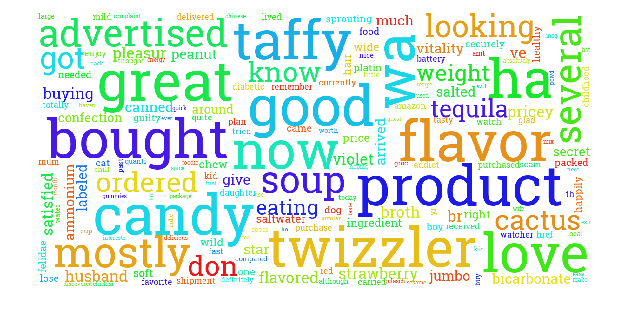

In [174]:
from colormap import Colormap
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
from os import path
import os
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        font_path=os.path.join('fonts', 'RobotoSlab-Regular.ttf'),
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
#         Colormap="terrain",
        scale=3
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(10, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(amazon["text_Clean1"]) 

## Low Score reviews word cloud 

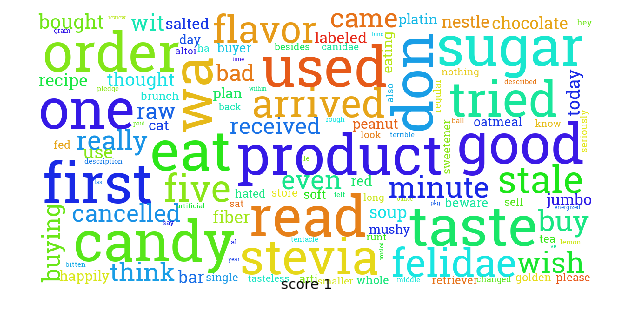

In [171]:
show_wordcloud(amazon[amazon.Score == 1]["text_Clean1"], title = "score 1")

## High Score reviews word cloud

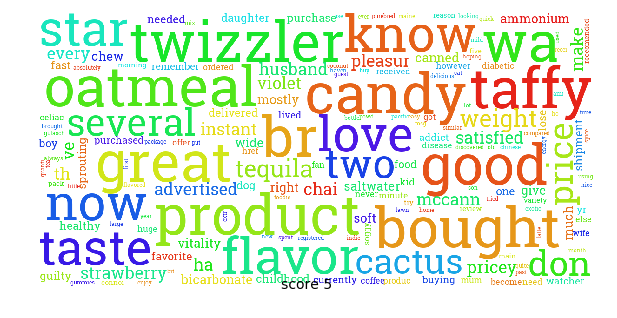

In [176]:
show_wordcloud(amazon[amazon.Score == 5]["text_Clean1"], title = "score 5")

In [52]:
# save clean data 
amazon.to_csv('amazon_clean.csv')

In [177]:
from collections import Counter

In [179]:
Counter(" ".join(amazon['text_Clean1']).split()).most_common(20)

[('the', 1872584),
 ('i', 1691771),
 ('a', 1515768),
 ('and', 1289727),
 ('it', 1108915),
 ('to', 1015470),
 ('of', 802076),
 ('is', 734365),
 ('this', 674772),
 ('br', 647092),
 ('for', 552586),
 ('in', 548111),
 ('my', 463888),
 ('that', 454263),
 ('but', 376334),
 ('you', 369927),
 ('with', 353185),
 ('have', 345518),
 ('not', 344909),
 ('are', 319025)]

# 2. Modeling 

## Splitting the data into train and test

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

In [184]:
df = pd.read_csv('amazon_clean.csv')
df.head(3)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date_time,date,helpful_pct,ppt_helpful,Helpful_pct,text_Clean1
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2011-04-27,1.0,NaN,1.0,i have bought several of the vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,2012-09-07,NaN,0.0,NaN,product arrived labeled a jumbo salted peanut ...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,2008-08-18,1.0,NaN,1.0,this is a confection that ha been around a few...


In [185]:
df.shape

(568412, 17)

In [190]:
df.HelpfulnessDenominator.describe()

count    568412.000000
mean          2.227872
std           8.288745
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

In [187]:
#include reviews that have more than 10 helpfulness data point only
df1 = df[(df.HelpfulnessDenominator > 10)].copy()
df1.shape 

(21437, 17)

In [196]:
#set up target variable -transform Helpfulness into a binary variable
threshold = 0.7
df1.loc[:, 'Helpful'] = np.where(df1.loc[:, 'HelpfulnessNumerator'] \
                                 / df1.loc[:, 'HelpfulnessDenominator'] > threshold, 1, 0)
df1.head(7)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date_time,date,helpful_pct,ppt_helpful,Helpful_pct,text_Clean1,Helpful
32,32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,2006-11-13,2006-11-13,1.000000,NaN,1.000000,mccann s instant oatmeal is great if you must ...,1
33,33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,Good Instant,This is a good instant oatmeal from the best o...,2006-12-17,2006-12-17,1.000000,NaN,1.000000,this is a good instant oatmeal from the best o...,1
82,82,83,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,Forget Molecular Gastronomy - this stuff rocke...,I know the product title says Molecular Gastro...,2012-01-04,2012-01-04,1.000000,NaN,1.000000,i know the product title say molecular gastron...,1
158,158,159,B000ITVLE2,A3NID9D9WMIV01,"Louie Arrighi ""Lou da Joo""",17,19,5,1260057600,tastes very fresh,"<span class=""tiny""> Length:: 0:26 Mins<br /><b...",2009-12-06,2009-12-06,0.894737,NaN,0.894737,span class tiny length 0 26 min br br span the...,1
287,287,288,B001UJEN6C,A1XM65S80UQ2MD,Joseph Kagan,13,13,5,1276214400,Great Natural Energy,"This is a fantastic product, and I wish it was...",2010-06-11,2010-06-11,1.000000,NaN,1.000000,this is a fantastic product and i wish it wa r...,1
324,324,325,B000JEHAHS,A2CU16YU1KEOUY,"Hurricane Ridge ""Chris""",5,19,1,1168300800,Never Arrived,So we cancelled the order. It was cancelled w...,2007-01-09,2007-01-09,0.263158,NaN,0.263158,so we cancelled the order it wa cancelled with...,0
381,381,382,B003YXWAF8,A1KQXO716WOOD6,Allison Beegle,7,13,1,1309305600,Waste of money,These condiments are overpriced and terrible. ...,2011-06-29,2011-06-29,0.538462,NaN,0.538462,these condiment are overpriced and terrible th...,0


In [197]:
df1.shape

(21437, 18)

In [198]:
print ('Count:')
display(df1.groupby('Helpful').count())

Count:


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date_time,date,helpful_pct,ppt_helpful,Helpful_pct,text_Clean1
Helpful,,,,,,,,,,,,,,,,,
0,5909,5909,5909,5909,5909,5909,5909,5909,5909,5909,5909,5909,5909,5909,0,5909,5909
1,15528,15528,15528,15528,15528,15528,15528,15528,15528,15528,15528,15528,15528,15528,0,15528,15528


In [199]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

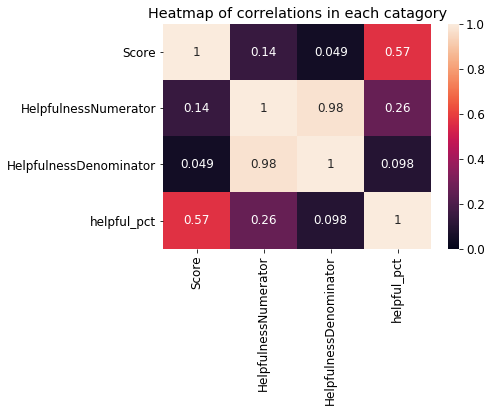

In [200]:
#Visualize correlation of the data
df2=df1[['Score','HelpfulnessNumerator','HelpfulnessDenominator','helpful_pct']]
correlations = df2.corr()
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations, vmin=0, vmax=1, annot=True)

In [214]:
#create a stemmer
stemmer = SnowballStemmer("english")

In [205]:
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

vectorizer = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01)
    #fit the vectorizers to the data.
features = vectorizer.fit_transform(df1['text_Clean1'])

In [206]:
X_train, X_test, y_train, y_test = train_test_split(features,df1['Helpful'], test_size=0.2, random_state=RAN_STATE)

In [216]:
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (17149,)
y_train shape: (17149,)

x_test shape: (4288,)
y_test shape: (4288,)



In [210]:
# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from time import time
from sklearn.metrics import roc_auc_score, roc_curve

In [211]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.2f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on roc_auc score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    probas = clf.predict_proba(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.2f} seconds.".format(end - start))
    return roc_auc_score(target.values, probas[:,1].T)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on roc_auc score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("ROC_AUC score for training set: {:.2f}.".format(predict_labels(clf, X_train, y_train)))
    print ("ROC_AUC score for test set: {:.2f}.\n".format(predict_labels(clf, X_test, y_test)))
    
def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [212]:
#Random state for classifiers
RAN_STATE = 42
# Initialize the models using a random state were applicable.
clf_list = [GaussianNB(), 
            RandomForestClassifier(random_state = RAN_STATE), 
            LogisticRegression(random_state = RAN_STATE),
            DecisionTreeClassifier(random_state = RAN_STATE)]
x_tr = X_train.toarray()
x_te = X_test.toarray()

# Set up the training set sizes for 100, 200 and 300 respectively.
train_feature_list = [x_tr[0:10000],x_tr[0:20000],x_tr]
train_target_list = [y_train[0:10000], y_train[0:20000], y_train]


# Execute the 'train_predict' function for each of the classifiers and each training set size
for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        train_predict(clf, a, b, x_te, y_test)

Training a GaussianNB using a training set size of 10000. . .
Trained model in 0.18 seconds
Made predictions in 0.17 seconds.
ROC_AUC score for training set: 0.79.
Made predictions in 0.06 seconds.
ROC_AUC score for test set: 0.75.

Training a GaussianNB using a training set size of 17149. . .
Trained model in 0.30 seconds
Made predictions in 0.37 seconds.
ROC_AUC score for training set: 0.78.
Made predictions in 0.06 seconds.
ROC_AUC score for test set: 0.75.

Training a GaussianNB using a training set size of 17149. . .
Trained model in 0.26 seconds
Made predictions in 0.34 seconds.
ROC_AUC score for training set: 0.78.
Made predictions in 0.06 seconds.
ROC_AUC score for test set: 0.75.

Training a RandomForestClassifier using a training set size of 10000. . .
Trained model in 0.73 seconds
Made predictions in 0.06 seconds.
ROC_AUC score for training set: 1.00.
Made predictions in 0.03 seconds.
ROC_AUC score for test set: 0.85.

Training a RandomForestClassifier using a training set s

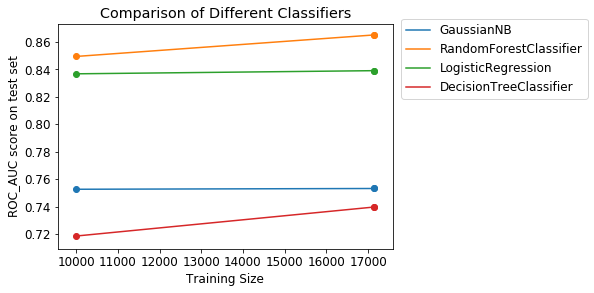

In [213]:
### Visualize differnet type of classifiers                                                               
FIG_SIZE = (26,20)
for clf in clf_list:
    x_graph = []
    y_graph = []
    for a, b in zip(train_feature_list, train_target_list):
        y_graph.append(clf_test_roc_score(clf, a, b, x_te, y_test))
        x_graph.append(len(a))
    plt.scatter(x_graph,y_graph)
    plt.plot(x_graph,y_graph, label = clf.__class__.__name__)

plt.title('Comparison of Different Classifiers')
plt.xlabel('Training Size')
plt.ylabel('ROC_AUC score on test set')
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.figure(figsize=FIG_SIZE)             
plt.show()

In [217]:
X_train2, X_test2, y_train, y_test = train_test_split(features, df1['Helpful'], test_size=0.2, random_state=RAN_STATE)

In [218]:
from sklearn import grid_search, cross_validation
#make the grid search object
gs2 = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**i for i in range(-5,5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.StratifiedKFold(y_train,n_folds=5),
    scoring='roc_auc'
)

#fit the grid search object to our new dataset
print ('Fitting grid search...')
gs2.fit(X_train2, y_train)
print ("Grid search fitted.")

Fitting grid search...
Grid search fitted.


In [219]:
#print the grid search scores.
print (gs2.best_estimator_)
gs2.grid_scores_

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[mean: 0.65619, std: 0.00666, params: {'C': 1e-05, 'class_weight': None},
 mean: 0.74324, std: 0.00658, params: {'C': 1e-05, 'class_weight': 'balanced'},
 mean: 0.66548, std: 0.00646, params: {'C': 0.0001, 'class_weight': None},
 mean: 0.74377, std: 0.00660, params: {'C': 0.0001, 'class_weight': 'balanced'},
 mean: 0.71216, std: 0.00618, params: {'C': 0.001, 'class_weight': None},
 mean: 0.74746, std: 0.00649, params: {'C': 0.001, 'class_weight': 'balanced'},
 mean: 0.76289, std: 0.00621, params: {'C': 0.01, 'class_weight': None},
 mean: 0.76991, std: 0.00651, params: {'C': 0.01, 'class_weight': 'balanced'},
 mean: 0.80858, std: 0.00562, params: {'C': 0.1, 'class_weight': None},
 mean: 0.81184, std: 0.00587, params: {'C': 0.1, 'class_weight': 'balanced'},
 mean: 0.82748, std: 0.00406, params: {'C': 1, 'class_weight': None},
 mean: 0.82806, std: 0.00461, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.82392, std: 0.00395, params: {'C': 10, 'class_weight': None},
 mean: 0.82318, s

ROC_AUC Score: 0.839416308755


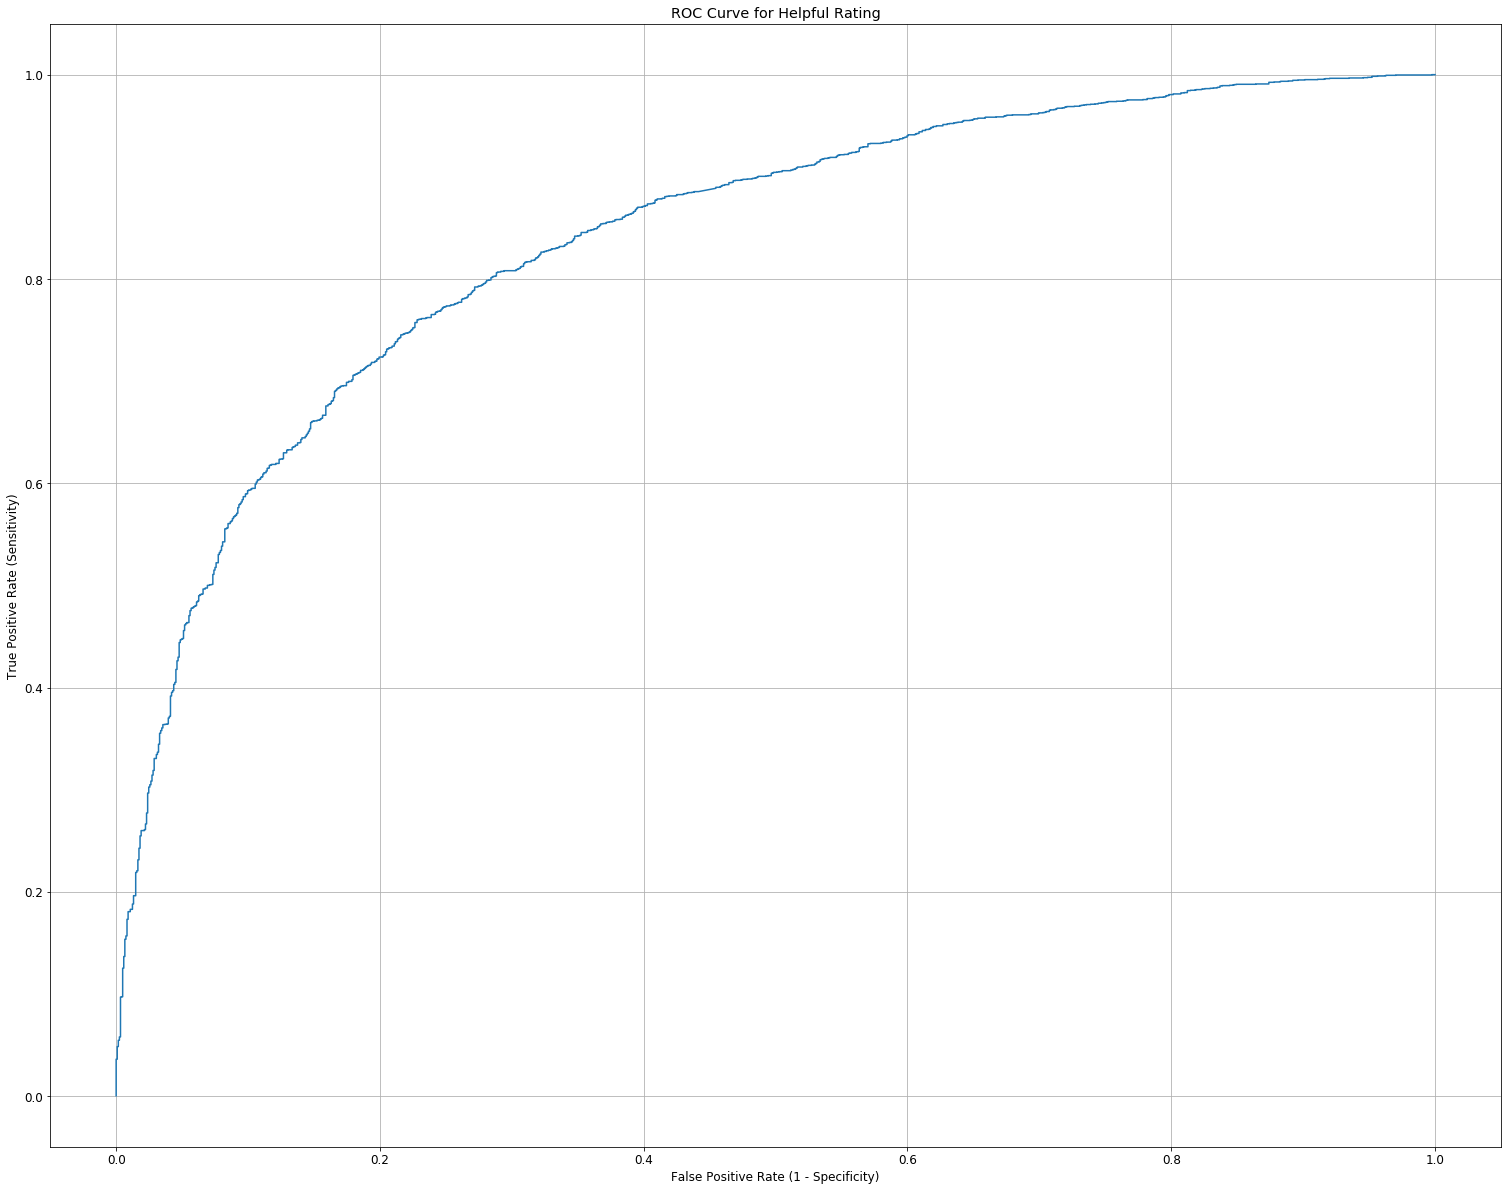

In [220]:
clf2 = gs2.best_estimator_
probas =clf2.predict_proba(X_test2)
plt.figure(figsize = FIG_SIZE)
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1])
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show

# ROC/AUC score
print ('ROC_AUC Score:',roc_auc_score(y_test, probas[:,1].T))